# __Notebook Imports__

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# __Constants__

In [0]:
TOKEN_SPAM_PROB_FILE = '/content/prob-spam.txt'
TOKEN_HAM_PROB_FILE = '/content/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = '/content/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = '/content/test-features.txt'
TEST_TARGET_FILE = '/content/test-target.txt'


VOCAB_SIZE = 2500

# __Load the Data__

In [0]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')

# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')


In [8]:
X_test[:5]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.]])

# __Calculating the Joint Probability__
## __The Dot Product__

In [9]:
a = np.array([1, 2, 3])
b = np.array([0, 5, 4])
print('a = ', a)
print('b = ', b)

a =  [1 2 3]
b =  [0 5 4]


In [10]:
a.dot(b)

22

In [11]:
1*0 + 2*5 + 3*4

22

In [12]:
c = np.array([[0, 6], [3, 0], [5, 1]])
print('Shape of c is', c.shape)
print(c)

Shape of c is (3, 2)
[[0 6]
 [3 0]
 [5 1]]


In [13]:
print(a.dot(c))
print('Shape of the dot product is', a.dot(c).shape)

[21  9]
Shape of the dot product is (2,)


In [14]:
[1*0 + 2*3 + 3*5, 1*6 + 2*0 + 3*1]

[21, 9]

In [15]:
X_test.shape

(1717, 2500)

In [16]:
prob_token_spam.shape

(2500,)

In [17]:
print('Shape of the dot product is ', X_test.dot(prob_token_spam).shape)

Shape of the dot product is  (1717,)


## __Set the Prior__

$$P(Spam \, | \, X) = \frac{PX \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [0]:
PROB_SPAM = 0.3116 # we calculated it earlier in the classifier notebook

In [19]:
np.log(prob_token_spam)

array([ -4.46592843,  -5.29210233,  -5.00618771, ...,  -9.05532265,
        -9.88823177, -12.19081687])

## __Joint Probability in log format__

In [0]:
# Calculate the log probability that the emails are spam given their tokens
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [21]:
joint_log_spam[:5]

array([ 1.78022192, 44.27207359, 24.5929809 ,  5.5208733 ,  8.39280138])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam)} {P(X)}$$

In [0]:
# Calculate the log probability that the emails are non-spam given their tokens
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [23]:
joint_log_ham[:5]

array([-10.39363396, -95.07358892, -66.20058887, -18.14848375,
       -27.57359379])

In [24]:
joint_log_ham.size

1717

# __Making Predictions__
## __Checking for the higher joint probability__

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<br>
<center>OR</center>
<br>

$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [0]:
prediction = joint_log_spam > joint_log_ham

In [26]:
prediction[-5:]

array([False, False, False, False, False])

In [27]:
# The last five emails in our prediction vector are non-spam emails
# Let's double check it:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### __Simplify__

$$P(X \, | \, Spam) \, P(Spam) \neq \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

In [0]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# __Metrics and Evaluation__
## __Accuracy__

In [29]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1670
Docs classified incorrectly 47


In [30]:
# Accuracy
correct_docs/len(X_test)

0.9726266744321491

In [31]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.74%
Accuracy of the model is 97.26%


## __Visualising the Results__

In [0]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

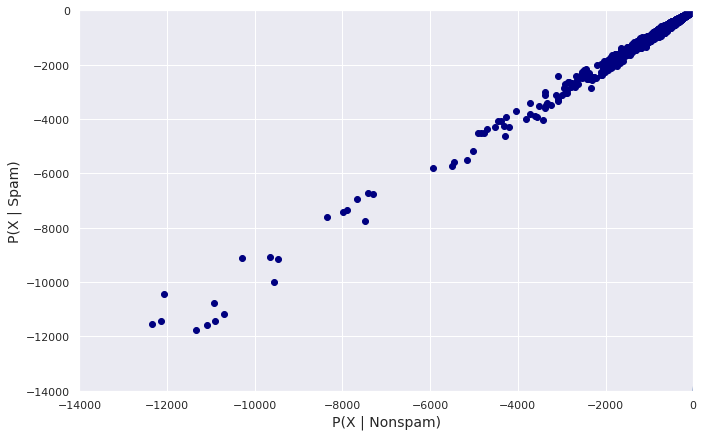

In [36]:
sns.set()
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')

plt.plot(linedata, )
plt.show()

## __The Decision Boundary__

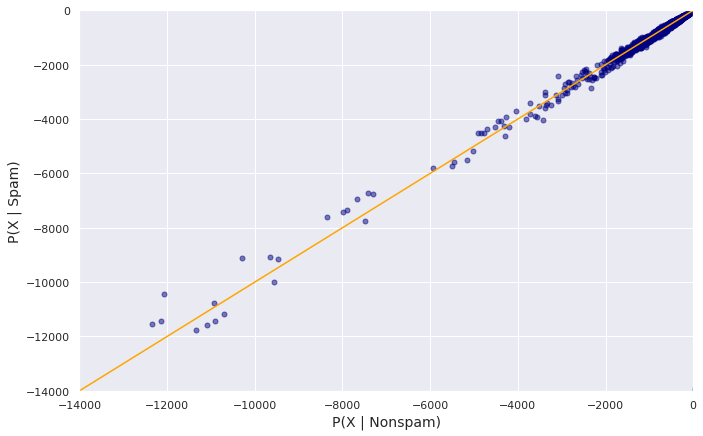

In [42]:
sns.set()
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.plot(linedata, )
plt.show()

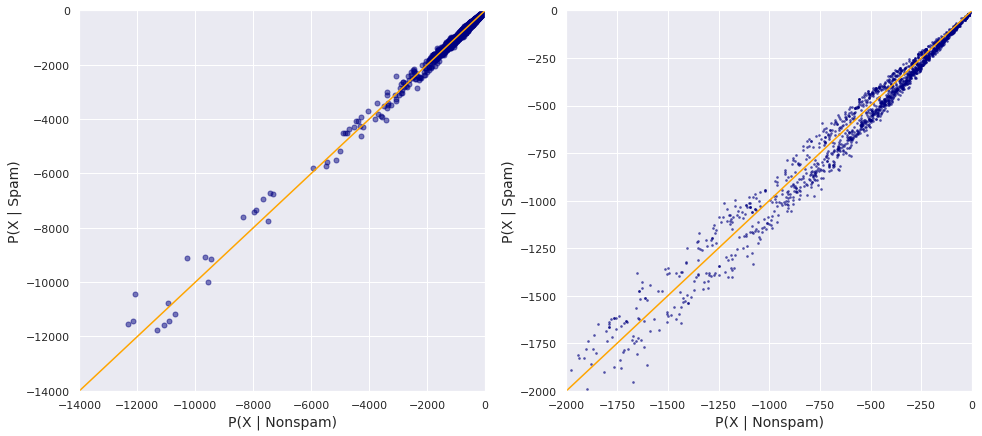

In [44]:
plt.figure(figsize=(16, 7))

#Chart Nr.1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr.2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [0]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                           labels: y_test})


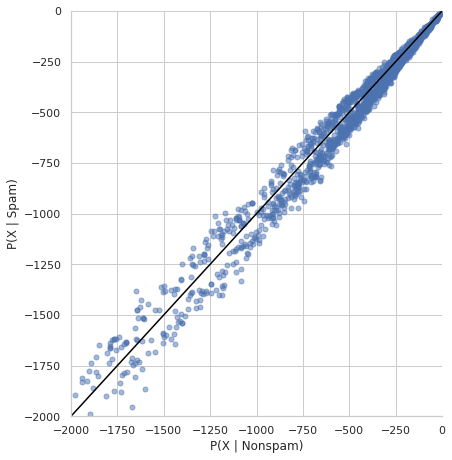

In [53]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False,
           scatter_kws={'alpha': 0.5, 's': 25})

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

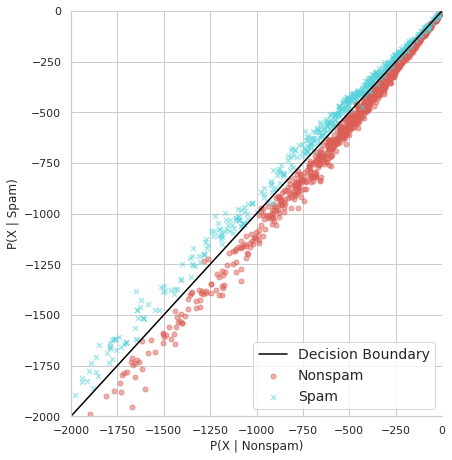

In [61]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

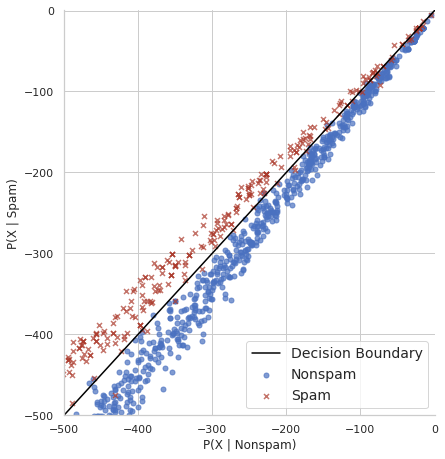

In [65]:
my_colors = ['#4A71C0', '#AB3A2C']

sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colors)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

### __False Positives and False Negatives__

In [66]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1158,  559]))

In [0]:
true_pos = (y_test == 1) & (prediction == 1) # check for each element if it's a spam

In [68]:
true_pos.sum()

547

In [69]:
true_pos

array([ True,  True,  True, ..., False, False, False])

In [71]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

12

In [73]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

35

## __Recall Score__

In [74]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))


Recall score is 93.99%


## __Precision Score__

In [75]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.979


## __F-Score or F1 Score__

Harmonic mean of the precision and recall

In [76]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F-Score is {:.2}'.format(f1_score))

F-Score is 0.96
